## _Supervised Learning:   Random Forest Classifier, Linear Classifier_

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Read data

root_path = 'C:\\Uni\\Year 3\\Semester 1\\Artificial Intelligence 1\\Lab 08\\'

In [3]:
df = pd.read_csv(root_path + 'credit_approval.csv')

In [4]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  690 non-null    int64  
 1   1           690 non-null    int64  
 2   2           690 non-null    float64
 3   3           690 non-null    float64
 4   4           690 non-null    int64  
 5   5           690 non-null    int64  
 6   6           690 non-null    int64  
 7   7           690 non-null    float64
 8   8           690 non-null    int64  
 9   9           690 non-null    int64  
 10  10          690 non-null    int64  
 11  11          690 non-null    int64  
 12  12          690 non-null    int64  
 13  13          690 non-null    int64  
 14  14          690 non-null    int64  
 15  15          690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [6]:
df.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

### Exploring Data

In [7]:
import matplotlib.pyplot as plt

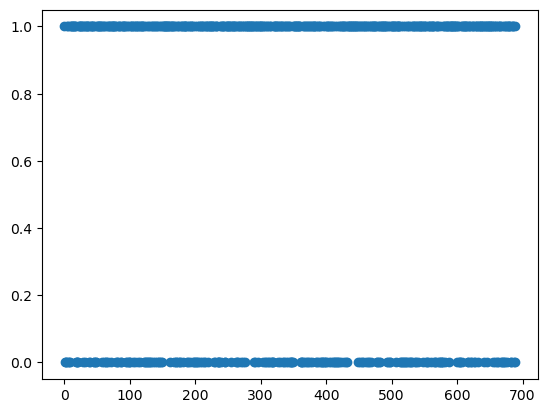

In [8]:
# Categorical attributes

plt.scatter(range(len(df)), df['1'])

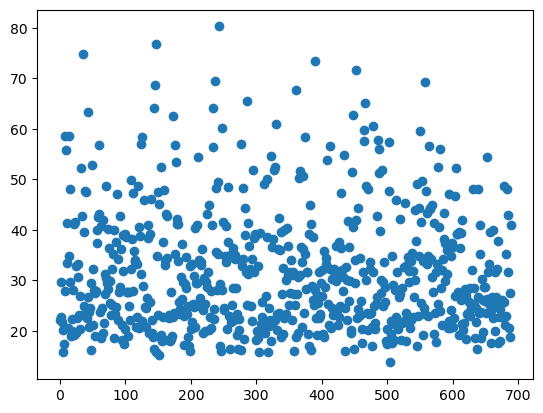

In [9]:
# Numerical attributes

plt.scatter(range(len(df)), df['2'])

### Preprocessing

### Task 0

**a)** Rename the first 14th (relevant) columns as `col1`, `col2` ... `col14` and the last column as `target`. Your function should return both the data corresponding to the _X values_ and the _Y values_.

_Hint:_ You can use the `drop` function explained [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to eliminate the first column.

In [10]:
def clean_df(df):
    del df[df.columns[0]]

    col_names = []
    length_minus_one = len(df.columns) - 1

    for i in range(length_minus_one):
        col_names.append("col" + str(i + 1))
    
    col_names.append("target")

    df.columns = col_names
    x = df.iloc[:, :length_minus_one]  
    y = df['target'] 
    return x, y


In [11]:
dataX, dataY = clean_df(df)

In [12]:
# Verify result
dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


**b)** Which columns could be classified as categorical? Plot one column of your choice containing numerical values. Justify your choice (please use the `markdown` option provided in your notebook).

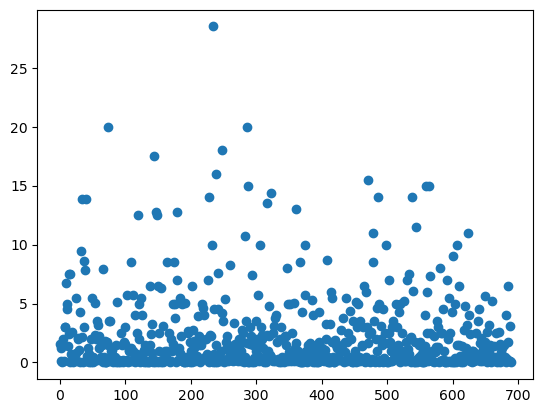

In [13]:
# TO DO: 
plt.scatter(range(len(df)), df['col7'])

Categorical columns = col1, col4, col6, col8, col9, col11, col12 (They have less than 10 unique values)

Plotted col7 cause it has quite a few rows with different numbers and they look nice on scatter plot ¯\\_(ツ)_/¯

In [14]:
# Verify result
dataY.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

**c)** Does the data stored in the `target` data frame have numerical attributes? Besides the graphical representation, how can the values of a column be classified as numerical or categorical?

In [15]:
# TO DO:
# target doesn't have numerical attributes, it's a binary true/false column
# we classify a column as numerical or categorical based
# on how many unique numbers it has (usually > 10 for numerical)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Normalization

### Task 1

The following formula computes a _Z score_ and measures how far a single raw data value is from the population mean.

\begin{equation*}
z = \frac{X - \mu }{\sigma }
\end{equation*}

where:
* **_X_** is a single raw data value
* `mu` is the population mean
* `sigma` is the population standard deviation

The `compute_stats` function receives a `DataFrame object` for which builds a `stats DataFrame` where the mean and standard deviation are computed for each column of the input.

The final result should have 3 columns:
* the name of the column for which the mean and the standard deviation were computed,
* the mean column computed for the values in the corresponding column,
* the standard deviation computed for the values in the corresponding column.

_Hints:_ 
1. You might want to use `df.loc` property [which can be found here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

2. Verify your data by using `notnull()` [function.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

You may use:
`df.loc[df[column_name].notnull(), column_name]` to access all the elements of a column that are not null.

In [16]:
def compute_stats(df):
    stats = []

    for col in df.columns:
        # values that aren't null
        valid_values = df.loc[df[col].notnull(), col]
        
        # compute mean and standard deviation
        col_mean = valid_values.mean()
        col_std = valid_values.std()
        
        # add them to the list
        stats.append({
            'column_name': col,
            'mean': col_mean,
            'std': col_std
        })

    stats = pd.DataFrame(stats)

    return stats


In [17]:
stats_dataX = compute_stats(dataX)

In [18]:
# Expected Output:
stats_dataX

,column_name,mean,std
0,col1,0.678261,0.467482
1,col2,31.568203,11.853273
2,col3,4.758725,4.978163
3,col4,1.766667,0.430063
4,col5,7.372464,3.683265
5,col6,4.692754,1.992316
6,col7,2.223406,3.346513
7,col8,0.523188,0.499824
8,col9,0.427536,0.495080
9,col10,2.400000,4.862940


To finish this task, use the `stats DataFrame` computed before and compute the _Z score_ formula.

In [19]:
def normalize(df, stats):
    for col in df.columns:
        # make them all float
        df[col] = df[col].astype(float)
        
        # for each column get the mean and standard deviation
        col_stats = stats.loc[stats['column_name'] == col]
        col_mean = col_stats['mean'].values[0]
        col_std = col_stats['std'].values[0]
        
        # compute z score (row data - mean) / deviation
        df.loc[df[col].notnull(), col] = (
            df.loc[df[col].notnull(), col] - col_mean
        ) / col_std
    
    return df


In [20]:
norm_dataX = normalize(dataX, stats_dataX)

In [21]:
# Expected Output:
norm_dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.688238,-0.800471,1.346134,0.542556,-0.915618,-0.347713,-0.190767,-1.046745,-0.863570,-0.493529,1.087120,0.237655,-0.488004,0.037353
1,-1.450880,-0.750696,0.450221,0.542556,0.170375,-0.347713,-0.615090,-1.046745,-0.863570,-0.493529,-0.918529,0.237655,-0.139490,-0.195272
2,-1.450880,-0.167735,-0.604384,-1.782685,-0.915618,-0.347713,-0.290872,-1.046745,-0.863570,-0.493529,1.087120,0.237655,0.557539,-0.195272
3,-1.450880,-0.835061,1.354169,-1.782685,-0.644120,-0.849641,-0.664395,0.953958,1.156306,1.768477,1.087120,0.237655,-1.068862,-0.195272
4,0.688238,-0.961608,0.685248,0.542556,-0.372622,-0.347713,-0.078711,0.953958,1.156306,2.385388,-0.918529,0.237655,-0.720347,-0.164946


### Task 2
 
Fill in the missing elements in:
 
**a)** the `get_score` function below:

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    
    # probabilities of each class, every resource online said to use predict_profa instead of normal predict
    # something about profa having float values instead of binary 0's and 1's giving better accuracy 
    
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]
    
    train_roc_scores = roc_auc_score(y_train, train_probs)
    test_roc_scores = roc_auc_score(y_test, test_probs)
    
    return train_roc_scores, test_roc_scores


In [24]:
# Perform k-fold manually
import random
 
# only 5 folds cuz that's what it is asked for 
k = 5
fold_size = len(dataX) // k

# randomly shuffle
dataX_i = list(dataX.index.values)
random.shuffle(dataX_i)


**b)** Store the rearranged indices in 5 different lists, congregated in the list of lists `xi`.

In [25]:
# xi = TO DO

# splitting into 5 folds (k is 5)
xi = [dataX_i[i * fold_size: (i + 1) * fold_size] for i in range(k)]

In [26]:
print(xi)

[[583, 511, 334, 425, 252, 81, 411, 203, 14, 592, 459, 365, 254, 242, 50, 419, 516, 241, 641, 469, 300, 356, 390, 255, 90, 53, 372, 575, 572, 570, 54, 151, 19, 6, 458, 121, 386, 276, 613, 112, 63, 475, 154, 76, 342, 222, 33, 443, 674, 313, 447, 105, 197, 140, 546, 47, 57, 12, 3, 183, 224, 557, 169, 85, 362, 507, 204, 336, 243, 78, 527, 127, 437, 268, 109, 200, 349, 317, 226, 84, 270, 647, 258, 249, 460, 306, 456, 383, 378, 235, 488, 471, 263, 352, 484, 257, 463, 75, 202, 384, 614, 181, 525, 405, 449, 424, 487, 314, 62, 102, 651, 649, 457, 508, 500, 95, 41, 587, 168, 561, 286, 265, 205, 462, 468, 477, 348, 381, 529, 576, 264, 536, 8, 526, 466, 119, 534, 250], [131, 669, 632, 124, 528, 305, 146, 122, 668, 144, 653, 610, 605, 83, 157, 360, 440, 420, 582, 21, 167, 402, 364, 684, 423, 495, 664, 229, 631, 478, 35, 323, 660, 677, 225, 152, 422, 110, 537, 428, 358, 10, 414, 517, 186, 628, 125, 353, 278, 93, 565, 96, 560, 290, 137, 571, 658, 579, 552, 318, 291, 465, 598, 366, 171, 485, 597, 280

In [27]:
train_scores_lr = []
test_scores_lr = []

### Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against. [Source](https://doi.org/10.1007/978-0-387-39940-9_565)

One example of _Cross Validation_ techniques that can be useful is represented by k-fold cross validation. In our exercise, let us set the value of `k=5` such that we test different portions of our dataset and verify the performance of the model.

In [28]:
i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Logistic Regression
    logReg = LogisticRegression(solver='liblinear')
    
    # Evaluate model
    train_slr, test_slr = get_score(logReg, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_lr.append(train_slr)
    test_scores_lr.append(test_slr)
    
    i += 1

In [29]:
print('Logistic Regression scores TRAIN: ', train_scores_lr)
print('Logistic Regression scores TEST: ', test_scores_lr)

Logistic Regression scores TRAIN:  [0.9406291655558519, 0.9368344370860927, 0.9486825512709895, 0.9464887397285815, 0.936168234231362]
Logistic Regression scores TEST:  [0.9361433087460485, 0.9547325102880657, 0.9076923076923077, 0.9087837837837838, 0.9520970832446243]


In [30]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores.to_csv(root_path + 'scores.csv')

### Task 3

**a)** Implement for this problem a Random Forest Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**b)** Implement for this problem a Linear Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**c)** Which algorithm performed best? Why?

In [31]:
# a) random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# use 17 to get same result every time
rf = RandomForestClassifier(random_state=17)

# number of trees, max depth of each, minimum number of samples
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# find best parameters with 5 fold cross validation (cv = 5) as asked
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(dataX, dataY.values.ravel())

# evaluating using best estimator
best_rf = grid_search_rf.best_estimator_
rf_scores = cross_val_score(best_rf, dataX, dataY, cv=5, scoring='roc_auc')

# adding to dataScores
dataScores['RF scores train'] = rf_scores.mean()
print(f"Random Forest Average ROC AUC Score: {rf_scores.mean()}")



# b) logistic regression (a linear classifier)

# define 
log_reg = LogisticRegression(solver='liblinear', random_state=17)

# hyperparameter grid for tuning
param_grid_log_reg = {
    'C': [0.1, 1, 10]
}

# find best parameters with 5 fold cross validation (cv = 5) as asked
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='roc_auc')
grid_search_log_reg.fit(dataX, dataY.values.ravel())

# evaluating using best estimator
best_log_reg = grid_search_log_reg.best_estimator_
log_reg_scores = cross_val_score(best_log_reg, dataX, dataY, cv=5, scoring='roc_auc')

# adding to dataScores
dataScores['LR scores train'] = log_reg_scores.mean()
print(f"Logistic Regression Average ROC AUC Score: {log_reg_scores.mean()}")


print("Random Forest ROC AUC Score: ", dataScores['RF scores train'])
print("Logistic Regression ROC AUC Score: ", dataScores['LR scores train'])

if log_reg_scores.mean() > rf_scores.mean():
    print("Logical Regression is better")
else:
    print("Random Forest Classifier is better")

# random forest is better because it can more accurately work with complex data sets and relationships

Random Forest Average ROC AUC Score: 0.9376914535268511
Logistic Regression Average ROC AUC Score: 0.931365557540792
Random Forest ROC AUC Score:  0    0.937691
1    0.937691
2    0.937691
3    0.937691
4    0.937691
Name: RF scores train, dtype: float64
Logistic Regression ROC AUC Score:  0    0.931366
1    0.931366
2    0.931366
3    0.931366
4    0.931366
Name: LR scores train, dtype: float64
Random Forest Classifier is better
